In [3]:
import DataLoader
import importlib
import pandas as pd
import CoverageHelper
import matplotlib.pyplot as plt
%matplotlib inline
coverage_df = DataLoader.load_csv_coverage()
importlib.reload(DataLoader)

Total covered methods:
2298614


Everything is good!
Number of apps: 
412


<module 'DataLoader' from 'C:\\Master\\Thesis\\IncubatorDataAnalyser\\DataLoader.py'>

In [4]:
importlib.reload(CoverageHelper)

<module 'CoverageHelper' from 'C:\\Master\\Thesis\\IncubatorDataAnalyser\\CoverageHelper.py'>

Coverage report

In [5]:
coverage_df.head()

,package,class,method,strategy,coverage_type,coverage_percentage,covered_lines,total_lines,app
0,com.Primerica.DatabaseUtilities,com.Primerica.DatabaseUtilities.QQData,QQData (): void,systematic,method,0,0,1,com.Primerica
1,com.Primerica.DatabaseUtilities,com.Primerica.DatabaseUtilities.QQData,QQData (): void,systematic,block,0,0,28,com.Primerica
2,com.Primerica.DatabaseUtilities,com.Primerica.DatabaseUtilities.QQDataBaseHelper,<static initializer>,systematic,method,0,0,1,com.Primerica
3,com.Primerica.DatabaseUtilities,com.Primerica.DatabaseUtilities.QQDataBaseHelper,<static initializer>,systematic,block,0,0,5,com.Primerica
4,com.Primerica.DatabaseUtilities,com.Primerica.DatabaseUtilities.QQDataBaseHelper,QQDataBaseHelper (Context): void,systematic,method,0,0,1,com.Primerica


Systematic App coverage

In [6]:
systematic_method_coverage = CoverageHelper.filter("method", "systematic", coverage_df)
systematic_coverage_per_app = CoverageHelper.calc_coverage(systematic_method_coverage)
systematic_coverage_per_app.head()
# systematic_coverage_per_app.plot.box()


app
alex.map.maps                                    21.951220
androidlab.carlog                                19.076923
appinventor.ai_agiapplications.CountYourSteps     0.000000
asp.aniemo.pack6.ext                             31.250000
bestfreelivewallpapers.funny_photo_editor         4.419621
Name: percentage_covered, dtype: float64

Random App coverage

In [7]:
random_method_coverage = CoverageHelper.filter("method", "random", coverage_df)
random_coverage_per_app = CoverageHelper.calc_coverage(random_method_coverage)
random_coverage_per_app.head()
# random_coverage_per_app.plot.box()

app
alex.map.maps                                    51.219512
androidlab.carlog                                17.230769
appinventor.ai_agiapplications.CountYourSteps     0.000000
asp.aniemo.pack6.ext                             31.250000
bestfreelivewallpapers.funny_photo_editor         6.605148
Name: percentage_covered, dtype: float64

Plot random vs systematic app coverage per app

,random,systematic
count,412.000000,412.000000
mean,23.586942,22.020925
std,17.458280,16.816771
min,0.000000,0.000000
25%,10.144928,9.443588
50%,19.610996,17.314267
75%,34.527209,32.597924
max,100.000000,100.000000


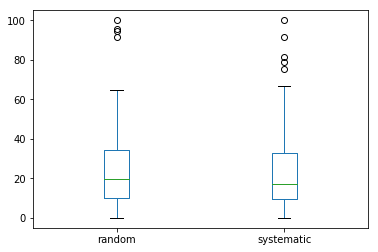

In [8]:
random_and_systematic_coverage = pd.concat(
    [random_coverage_per_app.rename('random'), systematic_coverage_per_app.rename('systematic')], axis=1,
    sort=False)
# random_and_systematic_coverage = random_and_systematic_coverage[
#     (random_and_systematic_coverage.random == 0) & (random_and_systematic_coverage.systematic == 0)]
random_and_systematic_coverage.plot.box()
random_and_systematic_coverage.describe()

Block app coverage

In [9]:
random_block_coverage = CoverageHelper.filter("block", "random", coverage_df)
random_block_coverage_per_app = CoverageHelper.calc_coverage(random_block_coverage)
random_block_coverage_per_app.describe()


count    412.000000
mean      21.377783
std       18.088044
min        0.000000
25%        8.120979
50%       15.816263
75%       31.035631
max      100.000000
Name: percentage_covered, dtype: float64

In [10]:
systematic_block_coverage = CoverageHelper.filter("block", "systematic", coverage_df)
systematic_block_coverage_per_app = CoverageHelper.calc_coverage(systematic_block_coverage)
systematic_block_coverage_per_app.describe()
# systematic_block_coverage_per_app.describe()


count    412.000000
mean      20.268312
std       17.884459
min        0.000000
25%        7.129994
50%       14.574038
75%       29.938018
max      100.000000
Name: percentage_covered, dtype: float64

In [11]:
random_and_systematic_block_coverage = pd.concat(
    [random_block_coverage_per_app.rename('random'), systematic_block_coverage_per_app.rename('systematic')], axis=1,
    sort=False)
random_and_systematic_block_coverage.head()


,random,systematic
app,,
alex.map.maps,20.455874,7.071888
androidlab.carlog,10.744052,11.926049
appinventor.ai_agiapplications.CountYourSteps,0.000000,0.000000
asp.aniemo.pack6.ext,56.593407,56.593407
bestfreelivewallpapers.funny_photo_editor,5.770879,4.361941


,random,systematic
count,412.000000,412.000000
mean,23.586942,22.020925
std,17.458280,16.816771
min,0.000000,0.000000
25%,10.144928,9.443588
50%,19.610996,17.314267
75%,34.527209,32.597924
max,100.000000,100.000000


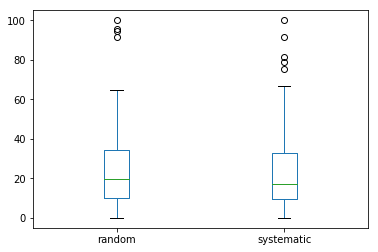

In [17]:
# random_and_systematic_coverage = random_and_systematic_coverage[
#     (random_and_systematic_coverage.random != 0) & (random_and_systematic_coverage.systematic != 0)]
random_and_systematic_coverage.plot.box()
plt.savefig("./data/boxplot-random-systematic-coverage.pdf", dpi=1200)
random_and_systematic_coverage.describe()

'\\begin{tabular}{lr}\n\\toprule\n{} &  diff\\_coverage \\\\\n\\midrule\ncount &     412.000000 \\\\\nmean  &       1.109471 \\\\\nstd   &       6.069239 \\\\\nmin   &     -42.345277 \\\\\n25\\%   &      -0.026845 \\\\\n50\\%   &       0.000000 \\\\\n75\\%   &       1.554236 \\\\\nmax   &      27.551296 \\\\\n\\bottomrule\n\\end{tabular}\n'

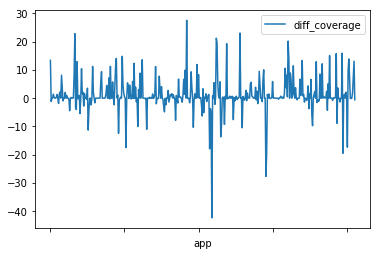

In [15]:
diff_in_coverage_per_app = random_and_systematic_block_coverage['random'] - random_and_systematic_block_coverage['systematic']
# systematic_block_coverage_per_app['percentage_covered'] = (systematic_block_coverage_per_app.covered_lines / systematic_block_coverage_per_app.total_lines) * 100
diff_in_coverage_per_app = diff_in_coverage_per_app.to_frame(name="diff_coverage")
diff_in_coverage_per_app.plot()
# diff_in_coverage_per_app["total_lines"] = random_block_coverage_per_app.total_lines
diff_in_coverage_per_app.head()
diff_in_coverage_per_app.describe().to_latex()

In [ ]:
diff_in_coverage_per_app.diff_coverage.describe().to_latex()


'\\begin{tabular}{lr}\n\\toprule\n{} &  diff\\_coverage \\\\\n\\midrule\ncount &     412.000000 \\\\\nmean  &       1.084321 \\\\\nstd   &       5.663559 \\\\\nmin   &     -42.345277 \\\\\n25\\%   &       0.000000 \\\\\n50\\%   &       0.000000 \\\\\n75\\%   &       1.400680 \\\\\nmax   &      27.551296 \\\\\n\\bottomrule\n\\end{tabular}\n'

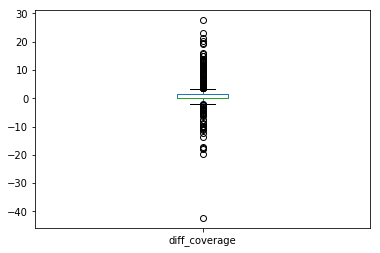

In [13]:
diff_in_coverage_per_app.diff_coverage.plot.box()

In [14]:
diff_in_coverage_per_app.plot.scatter(x=0, y="total_lines")
diff_in_coverage_per_app.corr()

KeyError: 'total_lines'

,random,systematic,total_lines
app,,,
alex.map.maps,20.455874,7.071888,6844
androidlab.carlog,10.744052,11.926049,6599
appinventor.ai_agiapplications.CountYourSteps,0.000000,0.000000,527
asp.aniemo.pack6.ext,56.593407,56.593407,182
bestfreelivewallpapers.funny_photo_editor,5.770879,4.361941,121368


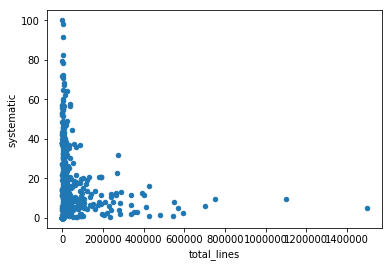

In [18]:

test = random_and_systematic_block_coverage
test["total_lines"] = random_block_coverage_per_app.total_lines
test.plot.scatter(y="systematic", x= "total_lines")
test.head()
